<a href="https://colab.research.google.com/github/kiron-ang/introduction/blob/main/introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hi! My name is Kiron Ang, and I'm so excited to teach you about bioinformatics! This interactive Python notebook contains a tutorial for analyzing single-cell transcriptomic data with Python. You might be wondering why I created this tutorial if other, amazing introductions already exist. Personally, I think it's beneficial to have a tutorial that's smaller in scope, focused on a recent research paper in 2025, and designed to introduce biologists to using Python programming in a Google Colab environment.

Before we get started, remember that this tutorial is designed for undergraduate and graduate students that have an interest in bioinformatics. I'm assuming that you have a strong background in biology and a weak background in computer science. If you want to improve your understanding of the biological principles behind single-cell work, please read https://www.sc-best-practices.org. If you want to improve your understanding of Python programming using the popular tool "Google Colab", please go to the "Education" section at https://colab.google/notebooks. If you have any questions or suggestions, please email me at kiron_ang1@baylor.edu!

Today, we'll be taking a look at publicly available data related to this research paper:

> Notaro, M., Borghetti, M., Bresesti, C. et al. In vivo armed macrophages curb liver metastasis through tumor-reactive T-cell rejuvenation. Nat Commun 16, 3471 (2025). https://doi.org/10.1038/s41467-025-58369-2

This dataset contains CD45⁺ immune cells isolated from mouse livers and liver metastases treated with experimental gene therapy to stimulate anti-tumor immunity. Although that might sound really complicated, I'll show you how to reproduce some of the basic analysis steps that the paper describes so you can understand more about the wonderful world of single-cell data! First, let's download the data; all the data will first be downloaded as a single ".tar" file. We need to extract the data from the ".tar" archive to actually work with it.

In Google Colab, we can use two types of commands: Bash commands that start with an exclamation mark (!), and Python commands. We have to use some Bash commands to get our workspace set up, but we'll use Python after that. Before doing anything else, we should see if there's anything in our workspace already by using the "ls" command; after all, it's important for computational biologists to stay organized!

In [1]:
# Print a list of the files we have access to
!ls

sample_data


Awesome! The only item in our workspace is a directory called "sample_data". Google Colab creates this folder every time you create a new notebook; it has some basic data you can play with, but we don't care about that right now. Now, let's download the actual data we care about with the "curl" command.

In [2]:
# Download the data from the research paper
# The --remote-name option tells the computer to keep the original file name
!curl --remote-name ftp.ncbi.nlm.nih.gov/geo/series/GSE273nnn/GSE273615/suppl/GSE273615_RAW.tar

# Print a list of the files we have access to
!ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3612M  100 3612M    0     0  91.6M      0  0:00:39  0:00:39 --:--:--  101M
GSE273615_RAW.tar  sample_data


You can see at the bottom of the cell's output that we have a ".tar" file, in addition to the "sample_data" folder. The Python commands I'll show you in a minute can't use ".tar" files as input data. So, we have to extract the files from the ".tar" archive with another bash command called "tar".

In [3]:
# Extract the data from the file that we downloaded
# The --extract option tells the computer to extract the files
# The --file option tells the computer what file we want to extract
!tar --extract --file=GSE273615_RAW.tar

It might seem like nothing happened, but let's take a look at the files in our workspace again.

In [4]:
# Print a list of the files we have access to
!ls

GSE273615_RAW.tar	      GSM8433835_Tumor10-1_GEX.zip
GSM8433816_M18.tar.gz	      GSM8433835_Tumor10-1_VDJ.zip
GSM8433817_M21.tar.gz	      GSM8433836_Liver11-1_GEX.zip
GSM8433820_Sample4_GEX.zip    GSM8433836_Liver11-1_VDJ.zip
GSM8433820_Sample4_VDJ.zip    GSM8433837_Tumor11_GEX.zip
GSM8433821_Sample6_GEX.zip    GSM8433837_Tumor11_VDJ.zip
GSM8433821_Sample6_VDJ.zip    GSM8433838_Liver9_GEX.zip
GSM8433822_Sample7_GEX.zip    GSM8433838_Liver9_VDJ.zip
GSM8433822_Sample7_VDJ.zip    GSM8433839_Liver9-1_GEX.zip
GSM8433823_Sample9_GEX.zip    GSM8433839_Liver9-1_VDJ.zip
GSM8433823_Sample9_VDJ.zip    GSM8433840_Tumor34_GEX.zip
GSM8433828_Liver3_VDJ.zip     GSM8433840_Tumor34_VDJ.zip
GSM8433829_Liver3-1_GEX.zip   GSM8433841_Tumor29_GEX.zip
GSM8433829_Liver3-1_VDJ.zip   GSM8433841_Tumor29_VDJ.zip
GSM8433830_Tumor3_GEX.zip     GSM8433842_Liver1_GEX.zip
GSM8433830_Tumor3_VDJ.zip     GSM8433842_Liver1_VDJ.zip
GSM8433831_Tumor3-1_GEX.zip   GSM8433843_Tumor1_GEX.zip
GSM8433831_Tumor3-1_VDJ.zip   GSM843

There are 21 ".zip" files in our workspace; we can't use these either, unfortunatley. However, these ".zip" archives contain even more files. We can extract them with the "unzip" command. Below, I use a single "unzip" for every single "GEX.zip" file.

In [5]:
# Unzip the important data files
# The -d option tells the computer to put the extracted information into a separate directory
!unzip GSM8433820_Sample4_GEX.zip -d Sample4
!unzip GSM8433821_Sample6_GEX.zip -d Sample6
!unzip GSM8433822_Sample7_GEX.zip -d Sample7
!unzip GSM8433823_Sample9_GEX.zip -d Sample9
!unzip GSM8433829_Liver3-1_GEX.zip -d Liver3-1
!unzip GSM8433832_Liver10_GEX.zip -d Liver10
!unzip GSM8433833_Liver10-1_GEX.zip -d Liver10-1
!unzip GSM8433836_Liver11-1_GEX.zip -d Liver11-1
!unzip GSM8433838_Liver9_GEX.zip -d Liver9
!unzip GSM8433839_Liver9-1_GEX.zip -d Liver9-1
!unzip GSM8433842_Liver1_GEX.zip -d Liver1
!unzip GSM8433844_Liver18_GEX.zip -d Liver18
!unzip GSM8433830_Tumor3_GEX.zip -d Tumor3
!unzip GSM8433831_Tumor3-1_GEX.zip -d Tumor3-1
!unzip GSM8433834_Tumor10_GEX.zip -d Tumor10
!unzip GSM8433835_Tumor10-1_GEX.zip -d Tumor10-1
!unzip GSM8433837_Tumor11_GEX.zip -d Tumor11
!unzip GSM8433843_Tumor1_GEX.zip -d Tumor1
!unzip GSM8433845_Tumor18_GEX.zip -d Tumor18
!unzip GSM8433841_Tumor29_GEX.zip -d Tumor29
!unzip GSM8433840_Tumor34_GEX.zip -d Tumor34

Archive:  GSM8433820_Sample4_GEX.zip
  inflating: Sample4/barcodes.tsv.gz  
  inflating: Sample4/__MACOSX/._barcodes.tsv.gz  
  inflating: Sample4/features.tsv.gz  
  inflating: Sample4/__MACOSX/._features.tsv.gz  
  inflating: Sample4/matrix.mtx.gz   
  inflating: Sample4/__MACOSX/._matrix.mtx.gz  
Archive:  GSM8433821_Sample6_GEX.zip
  inflating: Sample6/barcodes.tsv.gz  
  inflating: Sample6/__MACOSX/._barcodes.tsv.gz  
  inflating: Sample6/features.tsv.gz  
  inflating: Sample6/__MACOSX/._features.tsv.gz  
  inflating: Sample6/matrix.mtx.gz   
  inflating: Sample6/__MACOSX/._matrix.mtx.gz  
Archive:  GSM8433822_Sample7_GEX.zip
  inflating: Sample7/barcodes.tsv.gz  
  inflating: Sample7/__MACOSX/._barcodes.tsv.gz  
  inflating: Sample7/features.tsv.gz  
  inflating: Sample7/__MACOSX/._features.tsv.gz  
  inflating: Sample7/matrix.mtx.gz   
  inflating: Sample7/__MACOSX/._matrix.mtx.gz  
Archive:  GSM8433823_Sample9_GEX.zip
  inflating: Sample9/barcodes.tsv.gz  
  inflating: Sample9/

Those "barcodes.tsv.gz", "features.tsv.gz", and "matrix.mtz.gz" files are exactly what we need! Now, let's use the "pip" command to install a Python software tool for analyzing single-cell data.

In [6]:
# Install Scanpy (scanpy.readthedocs.io)
# The --quiet option tells the computer to be "quiet" and only give us important messages
!pip install --quiet scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.4 MB/s eta 0:00:00


The tool we installed is Scanpy. Scanpy comes with a lot of fun Python commands for analyzing single-cell data, but before we can use those commands, we have to use the "import" command. Let's import Scanpy and print out the version number.

In [7]:
# Import Scanpy so we can use Scanpy commands alongside Python
import scanpy

# Print the Scanpy version that is currently being used
print(scanpy.__version__)

1.11.1


Next, we have to tell Scanpy where all of our single-cell data is. We can use the "read_10x_mtx()" function 21 times to read the data from the 21 directories we created earlier with the "unzip" command.

In [8]:
# Give Scanpy access to the data
# The read_10_mtx() function "reads" in the data contained in a directory
# So, since we have 21 directories, we need to repeat the command 21 times
# The "=" symbol allows us to give a name to each dataset, so we can stay organized
Sample4 = scanpy.read_10x_mtx("Sample4")
Sample6 = scanpy.read_10x_mtx("Sample6")
Sample7 = scanpy.read_10x_mtx("Sample7")
Sample9 = scanpy.read_10x_mtx("Sample9")
Liver3_1 = scanpy.read_10x_mtx("Liver3-1")
Liver10 = scanpy.read_10x_mtx("Liver10")
Liver10_1 = scanpy.read_10x_mtx("Liver10-1")
Liver11_1 = scanpy.read_10x_mtx("Liver11-1")
Liver9 = scanpy.read_10x_mtx("Liver9")
Liver9_1 = scanpy.read_10x_mtx("Liver9-1")
Liver1 = scanpy.read_10x_mtx("Liver1")
Liver18 = scanpy.read_10x_mtx("Liver18")
Tumor3 = scanpy.read_10x_mtx("Tumor3")
Tumor3_1 = scanpy.read_10x_mtx("Tumor3-1")
Tumor10 = scanpy.read_10x_mtx("Tumor10")
Tumor10_1 = scanpy.read_10x_mtx("Tumor10-1")
Tumor11 = scanpy.read_10x_mtx("Tumor11")
Tumor1 = scanpy.read_10x_mtx("Tumor1")
Tumor18 = scanpy.read_10x_mtx("Tumor18")
Tumor29 = scanpy.read_10x_mtx("Tumor29")
Tumor34 = scanpy.read_10x_mtx("Tumor34")

We can use the "print()" function to learn more about each dataset.

In [9]:
# Print information about the different datasets
print(Sample4)
print(Sample6)
print(Sample7)
print(Sample9)
print(Liver3_1)
print(Liver10)
print(Liver10_1)
print(Liver11_1)
print(Liver9)
print(Liver9_1)
print(Liver1)
print(Liver18)
print(Tumor3)
print(Tumor3_1)
print(Tumor10)
print(Tumor10_1)
print(Tumor11)
print(Tumor1)
print(Tumor18)
print(Tumor29)
print(Tumor34)

AnnData object with n_obs × n_vars = 13975 × 32285
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 6447 × 32285
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 5322 × 32285
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 4876 × 32285
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 10262 × 32285
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 8191 × 32285
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 7715 × 32285
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 10285 × 32285
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 8036 × 32285
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 6630 × 32285
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 17858 × 32285
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 16

"AnnData object" is the type of data structure that Scanpy uses to organize data. "n_obs" refers to the number of individual, separate cells in the dataset, while "n_vars" refers to different measurements taken from each cell. If you want to learn more about AnnData objects, please read Scanpy's documentation at https://scanpy.readthedocs.io. Also, remember to read https://www.sc-best-practices.org for any general questions on single-cell.

Now, we're finally done with preparing our workspace! Great job on making it this far! The next step is to take the English sentences in the paper and translate them into Python code. For example, one of the sentences in the "Methods" section is:

> The resulting data was imported into R and processed with the Seurat package (v5.0.1).

By preparing our workspace, we've already imported the data into Python and processed it with Scanpy. "Seurat" is the name of a popular single-cell library written in the R programming language. I'm not going to discuss Seurat because it's beyond the scope of this tutorial, but read https://github.com/satijalab/seurat for more information.

The next sentence is this:

> All samples were merged into a single object and processed to remove cells with a low sequencing quality, those with a feature count below 600 and above 9000, as well as cells with a fraction of mitochondrial genes higher than 10 %.

We can use some Python commands to replicate this. However, instead of merging all samples, let's focus on one.

In [10]:
# Print information
print(Tumor1)

# Remove cells with a feature count below 600
scanpy.pp.filter_cells(Tumor1, min_counts=600)

# Remove cells with a feature count above 9000
scanpy.pp.filter_cells(Tumor1, max_counts=9000)

# Remove cells with a fraction of mitochondrial genes higher than 10%
Tumor1.var["mitochondrial_genes"] = Tumor1.var_names.str.startswith("mt-")
scanpy.pp.calculate_qc_metrics(Tumor1, qc_vars=["mitochondrial_genes"], inplace=True)
Tumor1 = Tumor1[Tumor1.obs.pct_counts_mitochondrial_genes < 0.1, :]

# Print information
print(Tumor1)

AnnData object with n_obs × n_vars = 19701 × 32285
    var: 'gene_ids', 'feature_types'
View of AnnData object with n_obs × n_vars = 404 × 32285
    obs: 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mitochondrial_genes', 'log1p_total_counts_mitochondrial_genes', 'pct_counts_mitochondrial_genes'
    var: 'gene_ids', 'feature_types', 'mitochondrial_genes', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'


We filtered out a lot of cells! A challenge for you is to add more print statements to figure out how many cells each Python command filtered out. Let's focus on visualizing the data now. According to the study, the authors used a UMAP representation:

> A principal component (PC) analysis with 100 PCs was performed for dimensional reduction, and afterwards, we computed a UMAP representation using the top 35 PCs.

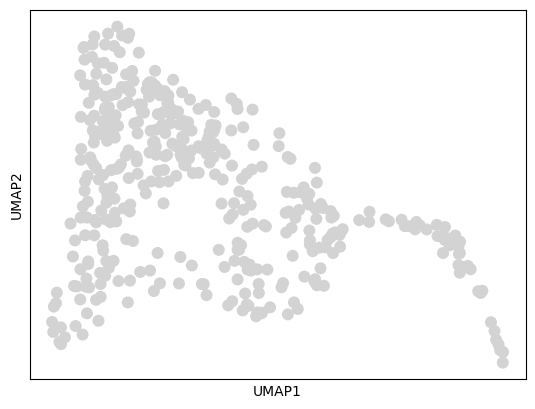

In [14]:
# Perform principal component analysis
scanpy.pp.pca(Tumor1, n_comps=100)

# Compute nearest neighbors
# This step is required before actually creating a UMAP
scanpy.pp.neighbors(Tumor1)

# Compute a UMAP representation
scanpy.tl.umap(Tumor1, n_components=35)

# Display the UMAP
scanpy.pl.umap(Tumor1)